In [4]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
raw_cvfs = pd.read_csv('Nepal' , sep='\t')
raw_cvfs.head()

C:\Users\nicho\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (18,19,20,21,22,23,48,49,50,51,52,53,58,59,60,61,62,63,68,69,70,71,72,73,78,79,80,81,82,83,88,89,90,91,92,93,98,99,100,101,102,103,108,109,110,111,112,113,118,119,120,121,122,123,128,129,130,131,132,133,168,169,170,171,172,173,208,209,210,211,212,213,248,249,250,251,252,253,288,289,290,291,292,293,328,329,330,331,332,333,358,359,360,361,362,363,388,389,390,391,392,393,418,419,420,421,422,423,448,449,450,451,452,453,478,479,480,481,482,483,508,509,510,511,512,513,538,539,540,541,542,543,578,579,580,581,582,583,588,589,590,591,592,593,598,599,600,601,602,603,608,609,610,611,612,613,618,619,620,621,622,623,628,629,630,631,632,633,638,639,640,641,642,643,648,649,650,651,652,653,654,655,656,668,669,670,671,672,673,678,679,680,681,682,683,688,689,690,691,692,693,698,699,700,701,702,703,708,709,710,711,712,713,738,739,740,741,742,743,786) have mixed types.Specify dtype option on import or s

,HHID,AGE1,GENDER1,AGE2,GENDER2,AGE3,GENDER3,INTNO,INTDATE,INTRVR,...,REM64,REM65,REM66,REM67,REM68,REM69,REM70,REM71,REM72,ENDTIME
0,2002,34,1,,,,,49,720401,187,...,0,0,0,0,700000,700000,750000,800000,175000,1024
1,2003,35,1,,,,,48,720401,187,...,0,150000,200000,0,0,0,0,0,100000,927
2,2004,60,0,,,,,34,720401,221,...,0,60000,60000,170000,70000,50000,50000,25000,0,939
3,2005,35,0,35,1,,,34,720401,165,...,0,0,380000,0,0,300000,100000,250000,0,939
4,2006,65,0,,,,,22,720401,116,...,0,0,0,0,0,0,150000,0,8000,1140


# Climate Data Information

In [6]:
climate_data = pd.DataFrame(columns=['Year', 'Temp', 'Precip'])

In [7]:
temp_annual = np.load('temp_annual.npy')
temp_annual2 = np.load('temp_annual2.npy')
Precip_annual = np.load('Precip_annual.npy')
Precip_annual2= np.load('Precip_annual2.npy')
climate_data['Year'] = np.arange(2001-1943,2021-1943, 1)
for i in range(10):
    climate_data['Temp'][i] = temp_annual[i]
    climate_data['Temp'][i + 10]= temp_annual2[i]
    climate_data['Precip'][i]= Precip_annual[i]
    climate_data['Precip'][i + 10] = Precip_annual2[i]

climate_data

<ipython-input-7-1172eb716b2f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_data['Temp'][i] = temp_annual[i]
<ipython-input-7-1172eb716b2f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_data['Temp'][i + 10]= temp_annual2[i]
<ipython-input-7-1172eb716b2f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_data['Precip'][i]= Precip_annual[i]
<ipython-input-7-1172eb716b2f>:10: SettingWithCopyWarning: 
A value 

,Year,Temp,Precip
0,58,23.591667,203.474991
1,59,23.525,196.841675
2,60,23.5,191.125
3,61,23.725,207.78334
4,62,23.583334,142.09166
5,63,24.016668,164.0
6,64,23.816666,164.483353
7,65,23.466665,217.275024
8,66,24.208334,145.216675
9,67,24.258333,176.825012


# Maize Data

In [8]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

raw_cvfs = pd.read_csv('Nepal' , sep='\t')

Maize = pd.DataFrame()
raw_cvfs.replace(' ', 0, inplace = True)
Maize['HHID'] = raw_cvfs['HHID']
for item in raw_cvfs.columns:
    if 'B12B' in item:
        Maize[item] = raw_cvfs[item].astype(float)
    elif 'B12A'in item:
        Maize[item] = raw_cvfs[item].astype(float)
    elif 'MIG' in item:
        Maize[item] = raw_cvfs[item].astype(float)
    elif 'REM' in item:
        Maize[item] = raw_cvfs[item].astype(float)
        
for col in Maize.columns:
    if ('MIG' in col) or ('REM' in col):
        Maize.rename(columns = {str(col):str(col)[0:3] + '_' + str(col)[-2:]}, inplace=True)
        

print(Maize.head())
Maize['B12B_64'].describe()
Maize_long = pd.wide_to_long(Maize, ['B12A', 'B12B', 'REM', 'MIG'], i = 'HHID', j = 'Year', sep = '_').reset_index()
print(Maize_long)

C:\Users\nicho\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (18,19,20,21,22,23,48,49,50,51,52,53,58,59,60,61,62,63,68,69,70,71,72,73,78,79,80,81,82,83,88,89,90,91,92,93,98,99,100,101,102,103,108,109,110,111,112,113,118,119,120,121,122,123,128,129,130,131,132,133,168,169,170,171,172,173,208,209,210,211,212,213,248,249,250,251,252,253,288,289,290,291,292,293,328,329,330,331,332,333,358,359,360,361,362,363,388,389,390,391,392,393,418,419,420,421,422,423,448,449,450,451,452,453,478,479,480,481,482,483,508,509,510,511,512,513,538,539,540,541,542,543,578,579,580,581,582,583,588,589,590,591,592,593,598,599,600,601,602,603,608,609,610,611,612,613,618,619,620,621,622,623,628,629,630,631,632,633,638,639,640,641,642,643,648,649,650,651,652,653,654,655,656,668,669,670,671,672,673,678,679,680,681,682,683,688,689,690,691,692,693,698,699,700,701,702,703,708,709,710,711,712,713,738,739,740,741,742,743,786) have mixed types.Specify dtype option on import or s

   HHID  B12A_63  B12A_64  B12A_65  B12A_66  B12A_67  B12A_68  B12A_69  \
0  2002      0.0      9.3      9.3      9.3      9.3      9.3      9.3   
1  2003      0.0     20.5     20.5     20.5     20.5     20.5      2.0   
2  2004      0.0     14.0     14.0     14.0     14.0     14.0     14.0   
3  2005      0.0      3.0      3.0      3.0      3.0      3.0      3.0   
4  2006      0.0      1.5      1.5      1.5      1.5      1.5      1.5   

   B12A_70  B12A_71  ...  REM_63  REM_64    REM_65    REM_66    REM_67  \
0      9.3      9.3  ...     0.0     0.0       0.0       0.0       0.0   
1      2.0      2.0  ...     0.0     0.0  150000.0  200000.0       0.0   
2     14.0     14.0  ...     0.0     0.0   60000.0   60000.0  170000.0   
3      0.0      0.0  ...     0.0     0.0       0.0  380000.0       0.0   
4      1.5      1.5  ...     0.0     0.0       0.0       0.0       0.0   

     REM_68    REM_69    REM_70    REM_71    REM_72  
0  700000.0  700000.0  750000.0  800000.0  175000.0  
1 

In [9]:
Maize_climate = Maize_long.merge(climate_data, on = "Year", how = 'inner')
Maize_climate['temp^2'] = Maize_climate['Temp'] ** 2 
Maize_climate['precip^2'] = Maize_climate['Precip'] ** 2

In [11]:
Maize_climate.tail()

,HHID,Year,B12A,B12B,REM,MIG,Temp,Precip,temp^2,precip^2
22545,170052,72,5.0,95.0,0.0,0.0,23.358335,164.400009,545.611837,27027.36301
22546,170061,72,0.0,0.0,0.0,0.0,23.358335,164.400009,545.611837,27027.36301
22547,171002,72,11.0,1000.0,0.0,1.0,23.358335,164.400009,545.611837,27027.36301
22548,171003,72,37.0,0.0,0.0,3.0,23.358335,164.400009,545.611837,27027.36301
22549,171004,72,3.0,350.0,0.0,4.0,23.358335,164.400009,545.611837,27027.36301


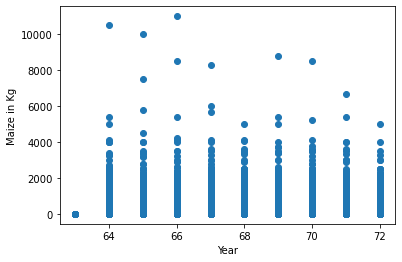

288.5281596452328

In [14]:
f,ax = plt.subplots()
graph = ax.scatter(Maize_long['Year'], Maize_long['B12B'])
#ax.set_ylim([0, 2000])
ax.set_ylabel('Maize in Kg')
ax.set_xlabel('Year')
plt.show()
Maize_long.loc[Maize_long['Year']==64]['B12B'].mean()
#plt.savefig('Maize_Graph.png')

         HHID  Year  B12A    B12B  REM  MIG       Temp      Precip  \
2255     2002    64   9.3   360.0  0.0  0.0  23.816666  164.483353   
2256     2003    64  20.5   900.0  0.0  0.0  23.816666  164.483353   
2257     2004    64  14.0   300.0  0.0  0.0  23.816666  164.483353   
2258     2005    64   3.0   120.0  0.0  0.0  23.816666  164.483353   
2259     2006    64   1.5   200.0  0.0  0.0  23.816666  164.483353   
...       ...   ...   ...     ...  ...  ...        ...         ...   
20288  170029    71   3.0   126.0  0.0  0.0  23.300001   54.641663   
20290  170052    71   5.0    63.0  0.0  0.0  23.300001   54.641663   
20292  171002    71  10.0  2000.0  0.0  0.0  23.300001   54.641663   
20293  171003    71  37.0  3600.0  0.0  2.0  23.300001   54.641663   
20294  171004    71   3.0   300.0  0.0  6.0  23.300001   54.641663   

           temp^2      precip^2  
2255   567.233563  27054.773303  
2256   567.233563  27054.773303  
2257   567.233563  27054.773303  
2258   567.233563  2705

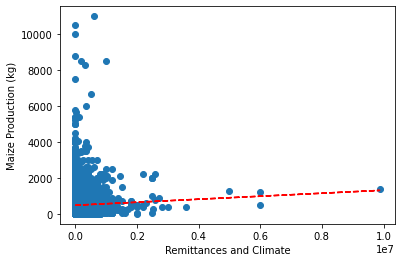

In [13]:
Maize_drop = Maize_climate[Maize_climate.Year != 63] 
Maize_drop = Maize_drop[Maize_drop.Year != 72]
Maize_drop = Maize_drop[Maize_drop.B12B != 0]
print(Maize_drop)
graph = ax.scatter(Maize_drop['Year'], Maize_drop['B12B'])
#ax.set_ylim([0, 2000])
ax.set_ylabel('Maize in Kg')
ax.set_xlabel('Year')
plt.show()
#plt.savefig('Maize_Graph.png')

f, ax1 = plt.subplots()

x = Maize_drop['REM']
y = Maize_drop['B12B']
ax1.scatter(x, y)

m, b = np.polyfit(x, y, 1)
ax1.plot(x, m*x+b, color='red', ls='--')

print('y = %fx + %f'%(m, b))

ax1.set_xlabel('Remittances and Climate')
ax1.set_ylabel('Maize Production (kg)')

plt.show()            

In [22]:
#Corn = Maize_drop.loc[Maize_drop['Year'] == 64]
#Corn.mean()

HHID        8.144261e+04
Year        6.400000e+01
B12A        1.173737e+01
B12B        5.399427e+02
REM         2.111618e+03
MIG         1.095436e-01
Temp        2.381667e+01
Precip      1.644834e+02
temp^2      5.672336e+02
precip^2    2.705477e+04
Yield                inf
dtype: float64

In [15]:
Maize_drop['REM'].describe()
             
Maize_drop['Yield'] = Maize_drop['B12B'] / Maize_drop['B12A']

y = Maize_drop['B12B']
        
x_1 = Maize_drop[['REM','Temp', 'Precip', 'temp^2', 'precip^2']]
    
x_1 = sm.add_constant(x_1)


est = sm.OLS(y.astype(float), x_1.astype(float))
est = est.fit()
est.summary()
#plt.savefig('Remittance to Maize Ratio')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   B12B   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     11.07
Date:                Sun, 26 Sep 2021   Prob (F-statistic):           1.17e-10
Time:                        17:37:04   Log-Likelihood:                -80953.
No. Observations:               10394   AIC:                         1.619e+05
Df Residuals:                   10388   BIC:                         1.620e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.18e+05   3.87e+04     -3.047      0.002   -1.94e+05   -4.21e+04
REM            0.0001   2.25e-05      4.653      0.000    6.07e-05       0.000
Temp        9946.1476   3262.972      3.048      0.002    3550.095    1.63e+04
Precip         2.4996      0.623      4.010      0.000       1.278       3.721
temp^2      -208.9099     68.709     -3.041      0.002    -343.592     -74.227
precip^2      -0.0083      0.002     -3.878      0.000      -0.013      -0.004
==============================================================================
Omnibus:                    10773.621   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1171941.372
Skew:                           4.990   Prob(JB):                         0.00
Kurtosis:                      54.053   Cond. No.                     1.89e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#              THE RICE SECTION  

In [362]:
Rice = pd.DataFrame()
raw_cvfs.replace(' ', 0, inplace = True)
Rice['HHID'] = raw_cvfs['HHID']
for item in raw_cvfs.columns:
    if 'B11B' in item:
        Rice[item] = raw_cvfs[item].astype(float)
        
    elif 'B11A' in item:
        Rice[item] = raw_cvfs[item].astype(float)
        
    elif 'MIG' in item:
        Rice[item] = raw_cvfs[item].astype(float)
        
    elif 'REM' in item:
        Rice[item] = raw_cvfs[item].astype(float)
        
for col in Rice.columns:
    if ('MIG' in col) or ('REM' in col):
        Rice.rename(columns = {str(col):str(col)[0:3] + '_' + str(col)[-2:]}, inplace=True)
        

print(Rice.head())
Rice['B11B_64'].describe()
Rice_long = pd.wide_to_long(Rice, ['B11A', 'B11B', 'REM', 'MIG'], i = 'HHID', j = 'Year', sep = '_').reset_index()
print(Rice_long)

   HHID  B11A_63  B11A_64  B11A_65  B11A_66  B11A_67  B11A_68  B11A_69  \
0  2002      0.0      7.0      7.0      7.0      7.0      7.0      7.0   
1  2003      0.0     20.5     20.5     20.5     20.5     20.5      2.0   
2  2004      0.0      7.0      7.0      7.0      7.0      7.0      7.0   
3  2005      0.0      3.0      3.0      3.0      3.0      3.0      3.0   
4  2006      0.0      3.0      3.0      3.0      3.0      3.0      3.0   

   B11A_70  B11A_71  ...  REM_63  REM_64    REM_65    REM_66    REM_67  \
0      7.0      7.0  ...     0.0     0.0       0.0       0.0       0.0   
1      2.0      2.0  ...     0.0     0.0  150000.0  200000.0       0.0   
2      7.0      7.0  ...     0.0     0.0   60000.0   60000.0  170000.0   
3      0.0      0.0  ...     0.0     0.0       0.0  380000.0       0.0   
4      3.0      3.0  ...     0.0     0.0       0.0       0.0       0.0   

     REM_68    REM_69    REM_70    REM_71    REM_72  
0  700000.0  700000.0  750000.0  800000.0  175000.0  
1 

In [363]:
Rice_climate = Rice_long.merge(climate_data, on = "Year", how = 'inner')
Rice_climate['temp^2'] = Rice_climate['Temp'] ** 2 
Rice_climate['precip^2'] = Rice_climate['Precip'] ** 2

In [364]:
Rice_climate.tail()

,HHID,Year,B11A,B11B,REM,MIG,Temp,Precip,temp^2,precip^2
22545,170052,72,20.0,0.0,0.0,0.0,23.358335,164.400009,545.611837,27027.36301
22546,170061,72,20.0,0.0,0.0,0.0,23.358335,164.400009,545.611837,27027.36301
22547,171002,72,17.0,0.0,0.0,1.0,23.358335,164.400009,545.611837,27027.36301
22548,171003,72,37.0,0.0,0.0,3.0,23.358335,164.400009,545.611837,27027.36301
22549,171004,72,20.0,0.0,0.0,4.0,23.358335,164.400009,545.611837,27027.36301


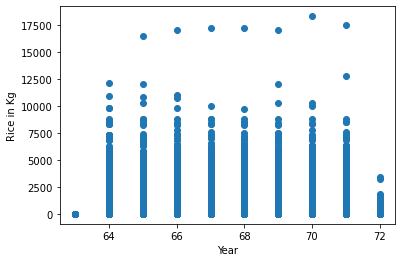

1027.7485587583149

In [249]:
f,ax = plt.subplots()
graph = ax.scatter(Rice_long['year'], Rice_long['B11B'])
#ax.set_ylim([0, 2000])
ax.set_ylabel('Rice in Kg')
ax.set_xlabel('Year')
plt.show()
Rice_long.loc[Rice_long['year']==71]['B11B'].mean()
#plt.savefig('Rice_Graph.png')

         HHID  Year  B11A    B11B  REM  MIG       Temp      Precip  \
2255     2002    64   7.0  1220.0  0.0  0.0  23.816666  164.483353   
2256     2003    64  20.5  2684.0  0.0  0.0  23.816666  164.483353   
2257     2004    64   7.0  1366.0  0.0  0.0  23.816666  164.483353   
2258     2005    64   3.0   488.0  0.0  0.0  23.816666  164.483353   
2259     2006    64   3.0   390.0  0.0  0.0  23.816666  164.483353   
...       ...   ...   ...     ...  ...  ...        ...         ...   
20290  170052    71  20.0  1757.0  0.0  0.0  23.300001   54.641663   
20291  170061    71  20.0  1952.0  0.0  0.0  23.300001   54.641663   
20292  171002    71  17.0  1952.0  0.0  0.0  23.300001   54.641663   
20293  171003    71  37.0  3000.0  0.0  2.0  23.300001   54.641663   
20294  171004    71  20.0  4000.0  0.0  6.0  23.300001   54.641663   

           temp^2      precip^2  
2255   567.233563  27054.773303  
2256   567.233563  27054.773303  
2257   567.233563  27054.773303  
2258   567.233563  2705

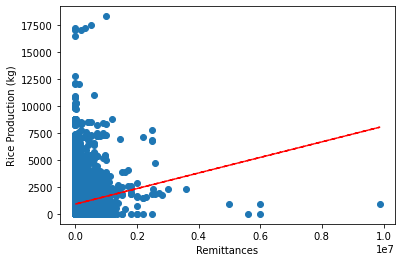

In [366]:
Rice_drop = Rice_climate[Rice_climate.Year != 63] 
Rice_drop = Rice_drop[Rice_drop.Year != 72]
print(Rice_drop)
graph = ax.scatter(Rice_drop['Year'], Rice_drop['B11B'])
ax.set_ylim([0, 2000])
ax.set_ylabel('Rice in Kg')
ax.set_xlabel('Year')
plt.show()
#plt.savefig('Rice_Graph.png')

f, ax1 = plt.subplots()

x = Rice_drop['REM']
y = Rice_drop['B11B']
ax1.scatter(x, y)

m, b = np.polyfit(x, y, 1)
ax1.plot(x, m*x+b, color='red', ls='--')

print('y = %fx + %f'%(m, b))

ax1.set_xlabel('Remittances')
ax1.set_ylabel('Rice Production (kg)')

plt.show()

In [368]:
Rice_drop['REM'].describe()
             
Rice_drop['Yield'] = Rice_drop['B11B'] / Rice_drop['B11A']

y = Rice_drop['B11B']
        
x_1 = Rice_drop[['REM', 'Temp', 'Precip', 'temp^2', 'precip^2']]
    
x_1 = sm.add_constant(x_1)


est = sm.OLS(y.astype(float), x_1.astype(float))
est = est.fit()
est.summary()
#plt.savefig('Remittance to Rice Ratio')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   B11B   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     60.31
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           1.60e-62
Time:                        10:44:25   Log-Likelihood:            -1.5425e+05
No. Observations:               18040   AIC:                         3.085e+05
Df Residuals:                   18034   BIC:                         3.086e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.242e+04   6.21e+04     -0.361      0.718   -1.44e+05    9.92e+04
REM            0.0007   4.25e-05     16.921      0.000       0.001       0.001
Temp        1992.6990   5227.751      0.381      0.703   -8254.191    1.22e+04
Precip         1.1722      1.019      1.150      0.250      -0.826       3.170
temp^2       -42.6025    110.071     -0.387      0.699    -258.353     173.148
precip^2      -0.0050      0.003     -1.440      0.150      -0.012       0.002
==============================================================================
Omnibus:                    12261.329   Durbin-Watson:                   1.387
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           293454.546
Skew:                           2.940   Prob(JB):                         0.00
Kurtosis:                      21.864   Cond. No.                     1.58e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#                  WHEAT SECTION    

In [252]:
Wheat = pd.DataFrame()
raw_cvfs.replace(' ', 0, inplace = True)
Wheat['HHID'] = raw_cvfs['HHID']
for item in raw_cvfs.columns:
    if 'B13A' in item:
        Wheat[item] = raw_cvfs[item].astype(float)
    elif 'B13B' in item:
        Wheat[item] = raw_cvfs[item].astype(float)
    elif 'REM' in item:
        Wheat[item] = raw_cvfs[item].astype(float)
    elif 'MIG' in item:
        Wheat[item] = raw_cvfs[item].astype(float)
        
for col in Wheat.columns:
    if ('MIG' in col) or ('REM' in col):
        Wheat.rename(columns = {str(col):str(col)[0:3] + '_' + str(col)[-2:]}, inplace=True)
        

print(Wheat.head())
Wheat['B13B_64'].describe()
Wheat_long = pd.wide_to_long(Wheat, ['B13A', 'B13B', 'REM', 'MIG'], i = 'HHID', j = 'Year', sep = '_').reset_index()
print(Wheat_long)

   HHID  B13A_63  B13A_64  B13A_65  B13A_66  B13A_67  B13A_68  B13A_69  \
0  2002      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1  2003      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2  2004      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3  2005      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4  2006      0.0      0.0      0.0      0.0      0.0      0.0      1.5   

   B13A_70  B13A_71  ...  REM_63  REM_64    REM_65    REM_66    REM_67  \
0      0.0      2.0  ...     0.0     0.0       0.0       0.0       0.0   
1      0.0      0.0  ...     0.0     0.0  150000.0  200000.0       0.0   
2      0.0      0.0  ...     0.0     0.0   60000.0   60000.0  170000.0   
3      0.0      0.0  ...     0.0     0.0       0.0  380000.0       0.0   
4      0.0      0.0  ...     0.0     0.0       0.0       0.0       0.0   

     REM_68    REM_69    REM_70    REM_71    REM_72  
0  700000.0  700000.0  750000.0  800000.0  175000.0  
1 

In [369]:
Wheat_climate = Wheat_long.merge(climate_data, on = "Year", how = 'inner')
Wheat_climate['temp^2'] = Wheat_climate['Temp'] ** 2 
Wheat_climate['precip^2'] = Wheat_climate['Precip'] ** 2

In [370]:
Wheat_climate.tail()

,HHID,Year,B13A,B13B,REM,MIG,Temp,Precip,temp^2,precip^2
22545,170052,72,0.0,0.0,0.0,0.0,23.358335,164.400009,545.611837,27027.36301
22546,170061,72,0.0,0.0,0.0,0.0,23.358335,164.400009,545.611837,27027.36301
22547,171002,72,0.0,0.0,0.0,1.0,23.358335,164.400009,545.611837,27027.36301
22548,171003,72,0.0,0.0,0.0,3.0,23.358335,164.400009,545.611837,27027.36301
22549,171004,72,0.0,0.0,0.0,4.0,23.358335,164.400009,545.611837,27027.36301


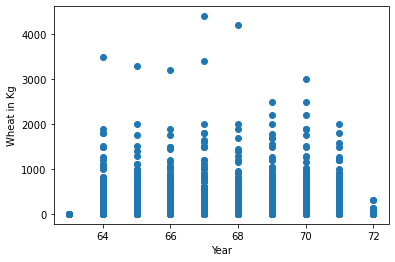

33.109977827051

In [254]:
f,ax = plt.subplots()
graph = ax.scatter(Wheat_long['Year'], Wheat_long['B13B'])
#ax.set_ylim([0, 2000])
ax.set_ylabel('Wheat in Kg')
ax.set_xlabel('Year')
plt.show()
Wheat_long.loc[Wheat_long['Year']==64]['B13B'].mean()
#plt.savefig('Wheat_Graph.png')

         HHID  Year  B13A  B13B  REM  MIG       Temp      Precip      temp^2  \
2255     2002    64   0.0   0.0  0.0  0.0  23.816666  164.483353  567.233563   
2256     2003    64   0.0   0.0  0.0  0.0  23.816666  164.483353  567.233563   
2257     2004    64   0.0   0.0  0.0  0.0  23.816666  164.483353  567.233563   
2258     2005    64   0.0   0.0  0.0  0.0  23.816666  164.483353  567.233563   
2259     2006    64   0.0   0.0  0.0  0.0  23.816666  164.483353  567.233563   
...       ...   ...   ...   ...  ...  ...        ...         ...         ...   
20290  170052    71   0.0   0.0  0.0  0.0  23.300001   54.641663  542.890053   
20291  170061    71   0.0   0.0  0.0  0.0  23.300001   54.641663  542.890053   
20292  171002    71   0.0   0.0  0.0  0.0  23.300001   54.641663  542.890053   
20293  171003    71   0.0   0.0  0.0  2.0  23.300001   54.641663  542.890053   
20294  171004    71   0.0   0.0  0.0  6.0  23.300001   54.641663  542.890053   

           precip^2  
2255   27054.7733

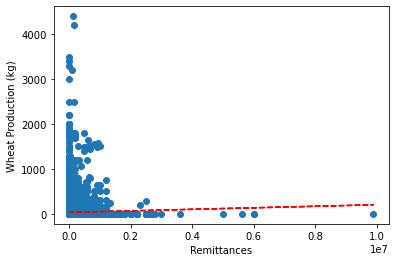

In [371]:
Wheat_drop = Wheat_climate[Wheat_climate.Year != 63] 
Wheat_drop = Wheat_drop[Wheat_drop.Year != 72]
print(Wheat_drop)
graph = ax.scatter(Wheat_drop['Year'], Wheat_drop['B13B'])
ax.set_ylim([0, 2000])
ax.set_ylabel('Wheat in Kg')
ax.set_xlabel('Year')
plt.show()
#plt.savefig('Rice_Graph.png')

f, ax1 = plt.subplots()

x = Wheat_drop['REM']
y = Wheat_drop['B13B']
ax1.scatter(x, y)

m, b = np.polyfit(x, y, 1)
ax1.plot(x, m*x+b, color='red', ls='--')

print('y = %fx + %f'%(m, b))

ax1.set_xlabel('Remittances')
ax1.set_ylabel('Wheat Production (kg)')

plt.show()

In [373]:
Wheat_drop['REM'].describe()
             
Wheat_drop['Yield'] = Wheat_drop['B13B'] / Wheat_drop['B13A']

y = Wheat_drop['B13B']
        
x_1 = Wheat_drop[['REM', 'Temp', 'Precip', 'temp^2', 'precip^2']]
    
x_1 = sm.add_constant(x_1)


est = sm.OLS(y.astype(float), x_1.astype(float))
est = est.fit()
est.summary()
#plt.savefig('Remittance to Wheat Ratio')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   B13B   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.680
Date:                Sat, 31 Jul 2021   Prob (F-statistic):             0.0199
Time:                        11:32:30   Log-Likelihood:            -1.1703e+05
No. Observations:               18040   AIC:                         2.341e+05
Df Residuals:                   18034   BIC:                         2.341e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8792.5423   7880.088      1.116      0.265   -6653.184    2.42e+04
REM         1.555e-05    5.4e-06      2.878      0.004    4.96e-06    2.61e-05
Temp        -734.3897    663.822     -1.106      0.269   -2035.543     566.764
Precip         0.0542      0.129      0.419      0.675      -0.200       0.308
temp^2        15.3882     13.977      1.101      0.271     -12.008      42.784
precip^2      -0.0002      0.000     -0.560      0.576      -0.001       0.001
==============================================================================
Omnibus:                    28016.360   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         18028325.952
Skew:                           9.859   Prob(JB):                         0.00
Kurtosis:                     156.609   Cond. No.                     1.58e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#      MUSTARD SECTION   

In [376]:
Mustard = pd.DataFrame()
raw_cvfs.replace(' ', 0, inplace = True)
Mustard['HHID'] = raw_cvfs['HHID']
for item in raw_cvfs.columns:
    if 'B14B' in item:
        Mustard[item] = raw_cvfs[item].astype(float)    
    elif 'B14A' in item:
        Mustard[item] = raw_cvfs[item].astype(float)
    elif 'MIG' in item:
        Mustard[item] = raw_cvfs[item].astype(float)
    elif 'REM' in item:
        Mustard[item] = raw_cvfs[item].astype(float)
        
for col in Mustard.columns:
    if ('MIG' in col) or ('REM' in col):
        Mustard.rename(columns = {str(col):str(col)[0:3] + '_' + str(col)[-2:]}, inplace=True)
        

print(Mustard.head())
Mustard['B14B_64'].describe()
Mustard_long = pd.wide_to_long(Mustard, ['B14A', 'B14B', 'REM', 'MIG'], i = 'HHID', j = 'Year', sep = '_').reset_index()
print(Mustard_long)

   HHID  B14A_63  B14A_64  B14A_65  B14A_66  B14A_67  B14A_68  B14A_69  \
0  2002      0.0      1.0      1.0      1.0      1.0      1.0      1.0   
1  2003      0.0     10.0     10.0     10.0     10.0     10.0      2.0   
2  2004      0.0      5.0      5.0      5.0      5.0      5.0      5.0   
3  2005      0.0      3.0      3.0      3.0      3.0      3.0      3.0   
4  2006      0.0      1.5      1.5      1.5      1.5      1.5      0.0   

   B14A_70  B14A_71  ...  REM_63  REM_64    REM_65    REM_66    REM_67  \
0      1.0      1.0  ...     0.0     0.0       0.0       0.0       0.0   
1      2.0      2.0  ...     0.0     0.0  150000.0  200000.0       0.0   
2      5.0      5.0  ...     0.0     0.0   60000.0   60000.0  170000.0   
3      0.0      0.0  ...     0.0     0.0       0.0  380000.0       0.0   
4      0.0      1.5  ...     0.0     0.0       0.0       0.0       0.0   

     REM_68    REM_69    REM_70    REM_71    REM_72  
0  700000.0  700000.0  750000.0  800000.0  175000.0  
1 

In [377]:
Mustard_climate = Mustard_long.merge(climate_data, on = "Year", how = 'inner')
Mustard_climate['temp^2'] = Mustard_climate['Temp'] ** 2 
Mustard_climate['precip^2'] = Mustard_climate['Precip'] ** 2

In [378]:
Mustard_climate.head()

,HHID,Year,B14A,B14B,REM,MIG,Temp,Precip,temp^2,precip^2
0,2002,63,0.0,0.0,0.0,0.0,24.016668,164.0,576.800357,26896.0
1,2003,63,0.0,0.0,0.0,0.0,24.016668,164.0,576.800357,26896.0
2,2004,63,0.0,0.0,0.0,0.0,24.016668,164.0,576.800357,26896.0
3,2005,63,0.0,0.0,0.0,0.0,24.016668,164.0,576.800357,26896.0
4,2006,63,0.0,0.0,0.0,0.0,24.016668,164.0,576.800357,26896.0


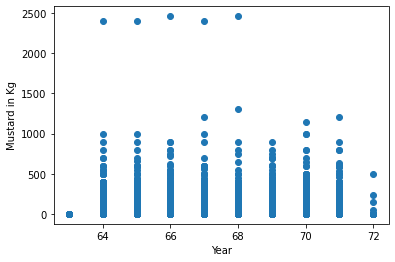

In [397]:
f,ax = plt.subplots()
graph = ax.scatter(Mustard_long['Year'], Mustard_long['B14B'])
#ax.set_ylim([0, 2000])
ax.set_ylabel('Mustard in Kg')
ax.set_xlabel('Year')
#plt.show()
#Mustard_long.loc[Mustard_long['year']==64]['B14B'].mean()
plt.savefig('Mustard_Graph')

         HHID  Year  B14A   B14B  REM  MIG       Temp      Precip      temp^2  \
2255     2002    64   1.0   70.0  0.0  0.0  23.816666  164.483353  567.233563   
2256     2003    64  10.0  150.0  0.0  0.0  23.816666  164.483353  567.233563   
2257     2004    64   5.0  200.0  0.0  0.0  23.816666  164.483353  567.233563   
2258     2005    64   3.0   50.0  0.0  0.0  23.816666  164.483353  567.233563   
2259     2006    64   1.5   60.0  0.0  0.0  23.816666  164.483353  567.233563   
...       ...   ...   ...    ...  ...  ...        ...         ...         ...   
20290  170052    71  10.0   60.0  0.0  0.0  23.300001   54.641663  542.890053   
20291  170061    71   0.0    0.0  0.0  0.0  23.300001   54.641663  542.890053   
20292  171002    71   0.0    0.0  0.0  0.0  23.300001   54.641663  542.890053   
20293  171003    71   0.0    0.0  0.0  2.0  23.300001   54.641663  542.890053   
20294  171004    71   0.0    0.0  0.0  6.0  23.300001   54.641663  542.890053   

           precip^2  
2255 

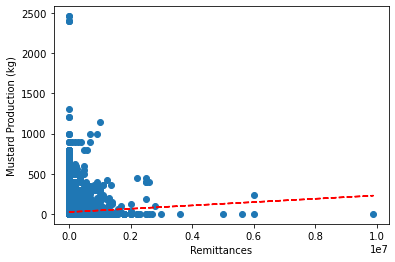

In [394]:
Mustard_drop = Mustard_climate[Mustard_climate.Year != 63] 
Mustard_drop = Mustard_drop[Mustard_drop.Year != 72]
print(Mustard_drop)
graph = ax.scatter(Mustard_drop['Year'], Mustard_drop['B14B'])
ax.set_ylim([0, 2000])
ax.set_ylabel('Mustard in Kg')
ax.set_xlabel('Year')
plt.show()
#plt.savefig('Mustard_Graph.png')

f, ax1 = plt.subplots()

x = Mustard_drop['REM']
y = Mustard_drop['B14B']
ax1.scatter(x, y)

m, b = np.polyfit(x, y, 1)
ax1.plot(x, m*x+b, color='red', ls='--')

print('y = %fx + %f'%(m, b))

ax1.set_xlabel('Remittances')
ax1.set_ylabel('Mustard Production (kg)')

#plt.show()
plt.savefig('Remittance to Mustard Ratio')

In [382]:
Mustard_drop['REM'].describe()
             
Mustard_drop['Yield'] = Mustard_drop['B14B'] / Mustard_drop['B14A']

y = Mustard_drop['B14B']
        
x_1 = Mustard_drop[['REM', 'Temp', 'Precip', 'temp^2', 'precip^2']]
    
x_1 = sm.add_constant(x_1)


est = sm.OLS(y.astype(float), x_1.astype(float))
est = est.fit()
est.summary()
#plt.savefig('Remittance to Mustard Ratio')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   B14B   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     12.90
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           1.50e-12
Time:                        11:52:54   Log-Likelihood:            -1.0630e+05
No. Observations:               18040   AIC:                         2.126e+05
Df Residuals:                   18034   BIC:                         2.127e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7379.6645   4348.477      1.697      0.090   -1143.766    1.59e+04
REM         1.904e-05   2.98e-06      6.387      0.000    1.32e-05    2.49e-05
Temp        -614.2101    366.317     -1.677      0.094   -1332.227     103.807
Precip         0.0478      0.071      0.669      0.503      -0.092       0.188
temp^2        12.8146      7.713      1.661      0.097      -2.303      27.933
precip^2      -0.0002      0.000     -1.015      0.310      -0.001       0.000
==============================================================================
Omnibus:                    28059.204   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         25876650.085
Skew:                           9.713   Prob(JB):                         0.00
Kurtosis:                     187.522   Cond. No.                     1.58e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#  RED LENTIL SECTION   

In [293]:
Red_lentil = pd.DataFrame()
raw_cvfs.replace(' ', 0, inplace = True)
Red_lentil['HHID'] = raw_cvfs['HHID']
for item in raw_cvfs.columns:
    if 'B15B' in item:
        Red_lentil[item] = raw_cvfs[item].astype(float)
        
    elif 'B15A' in item:
        Red_lentil[item] = raw_cvfs[item].astype(float)
    elif 'REM' in item:
        Red_lentil[item] = raw_cvfs[item].astype(float)
    elif 'MIG'in item:
        Red_lentil[item] = raw_cvfs[item].astype(float)
        
for col in Red_lentil.columns:
    if ('MIG' in col) or ('REM' in col):
        Red_lentil.rename(columns = {str(col):str(col)[0:3] + '_' + str(col)[-2:]}, inplace=True)

print(Red_lentil.head())
Red_lentil['B15B_64'].describe()
Red_lentil_long = pd.wide_to_long(Red_lentil, ['B15B', 'B15C', 'REM', 'MIG'], i = 'HHID', j = 'Year', sep = '_').reset_index()
print(Red_lentil_long)

   HHID  B15A_63  B15A_64  B15A_65  B15A_66  B15A_67  B15A_68  B15A_69  \
0  2002      0.0      0.8      0.8      0.8      0.8      0.8      0.8   
1  2003      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2  2004      0.0      2.0      2.0      2.0      2.0      2.0      2.0   
3  2005      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4  2006      0.0      0.0      0.0      0.0      0.0      0.0      1.5   

   B15A_70  B15A_71  ...  REM_63  REM_64    REM_65    REM_66    REM_67  \
0      0.8      0.8  ...     0.0     0.0       0.0       0.0       0.0   
1      2.0      2.0  ...     0.0     0.0  150000.0  200000.0       0.0   
2      2.0      2.0  ...     0.0     0.0   60000.0   60000.0  170000.0   
3      0.0      0.0  ...     0.0     0.0       0.0  380000.0       0.0   
4      1.5      0.0  ...     0.0     0.0       0.0       0.0       0.0   

     REM_68    REM_69    REM_70    REM_71    REM_72  
0  700000.0  700000.0  750000.0  800000.0  175000.0  
1 

In [384]:
Red_lentil_climate = Red_lentil_long.merge(climate_data, on = "Year", how = 'inner')
Red_lentil_climate['temp^2'] = Red_lentil_climate['Temp'] ** 2 
Red_lentil_climate['precip^2'] = Red_lentil_climate['Precip'] ** 2

In [385]:
Red_lentil_climate.tail()

,HHID,Year,B15A_67,B15A_70,B15A_64,B15A_65,B15A_66,B15A_68,B15A_69,B15A_72,B15A_63,B15A_71,B15B,B15C,REM,MIG,Temp,Precip,temp^2,precip^2
22545,170052,72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,23.358335,164.400009,545.611837,27027.36301
22546,170061,72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,23.358335,164.400009,545.611837,27027.36301
22547,171002,72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,23.358335,164.400009,545.611837,27027.36301
22548,171003,72,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,NaN,0.0,3.0,23.358335,164.400009,545.611837,27027.36301
22549,171004,72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,4.0,23.358335,164.400009,545.611837,27027.36301


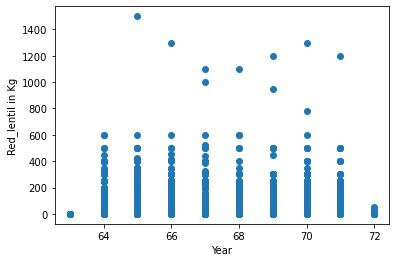

In [398]:
f,ax = plt.subplots()
graph = ax.scatter(Red_lentil_long['Year'], Red_lentil_long['B15B'])
#ax.set_ylim([0, 2000])
ax.set_ylabel('Red_lentil in Kg')
ax.set_xlabel('Year')
#plt.show()
#Red_lentil_long[Red_lentil_long['Year']==64]['B15B'].mean()
plt.savefig('Red_Lentil Graph')

         HHID  Year  B15A_67  B15A_70  B15A_64  B15A_65  B15A_66  B15A_68  \
2255     2002    64      0.8      0.8      0.8      0.8      0.8      0.8   
2256     2003    64      0.0      2.0      0.0      0.0      0.0      0.0   
2257     2004    64      2.0      2.0      2.0      2.0      2.0      2.0   
2258     2005    64      0.0      0.0      0.0      0.0      0.0      0.0   
2259     2006    64      0.0      1.5      0.0      0.0      0.0      0.0   
...       ...   ...      ...      ...      ...      ...      ...      ...   
20290  170052    71      0.0      0.0      0.0      0.0      0.0      0.0   
20291  170061    71      0.0      0.0      0.0      0.0      0.0      0.0   
20292  171002    71      0.0      0.0      0.0      0.0      0.0      0.0   
20293  171003    71      2.0      2.0      2.0      2.0      2.0      2.0   
20294  171004    71      0.0      0.0      0.0      0.0      0.0      0.0   

       B15A_69  B15A_72  B15A_63  B15A_71  B15B  B15C  REM  MIG       Temp 

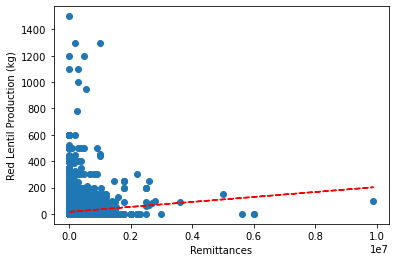

In [395]:
Red_lentil_drop = Red_lentil_climate[Red_lentil_climate.Year != 63] 
Red_lentil_drop = Red_lentil_drop[Red_lentil_drop.Year != 72]
print(Red_lentil_drop)
graph = ax.scatter(Red_lentil_drop['Year'], Red_lentil_drop['B15B'])
#ax.set_ylim([0, 2000])
ax.set_ylabel('Red Lentil in Kg')
ax.set_xlabel('Year')
plt.show()
#plt.savefig('Red Lentil Graph.png')

f, ax1 = plt.subplots()

x = Red_lentil_drop['REM']
y = Red_lentil_drop['B15B']
ax1.scatter(x, y)

m, b = np.polyfit(x, y, 1)
ax1.plot(x, m*x+b, color='red', ls='--')

print('y = %fx + %f'%(m, b))

ax1.set_xlabel('Remittances')
ax1.set_ylabel('Red Lentil Production (kg)')

#plt.show()
plt.savefig('Remittance to Red_Lentil Ratio')

In [387]:
Red_lentil_drop['REM'].describe()
             
Red_lentil_drop['Yield'] = Mustard_drop['B14B'] / Mustard_drop['B14A']

y = Red_lentil_drop['B15B']
        
x_1 = Red_lentil_drop[['REM', 'Temp', 'Precip', 'temp^2', 'precip^2']]
    
x_1 = sm.add_constant(x_1)


est = sm.OLS(y.astype(float), x_1.astype(float))
est = est.fit()
est.summary()
#plt.savefig('Remittance to Mustard Ratio'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   B15B   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     22.89
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           5.60e-23
Time:                        12:08:19   Log-Likelihood:                -97954.
No. Observations:               18040   AIC:                         1.959e+05
Df Residuals:                   18034   BIC:                         1.960e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        812.1031   2737.924      0.297      0.767   -4554.489    6178.695
REM         1.929e-05   1.88e-06     10.276      0.000    1.56e-05     2.3e-05
Temp         -67.0654    230.644     -0.291      0.771    -519.149     385.018
Precip         0.1086      0.045      2.416      0.016       0.020       0.197
temp^2         1.3961      4.856      0.287      0.774      -8.123      10.915
precip^2      -0.0003      0.000     -2.045      0.041      -0.001   -1.31e-05
==============================================================================
Omnibus:                    26071.610   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13385402.377
Skew:                           8.570   Prob(JB):                         0.00
Kurtosis:                     135.340   Cond. No.                     1.58e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
###################        MIGRATION SECTION ################

In [389]:
Migrants = pd.DataFrame()
raw_cvfs.replace(' ', 0, inplace = True)
Migrants['HHID'] = raw_cvfs['HHID']
for item in raw_cvfs.columns:
    if 'MIG' in item:
        Migrants[item] = raw_cvfs[item].astype(float)
    elif 'REM' in item:
        Migrants[item] = raw_cvfs[item].astype(float)
        
        

print(Migrants.head())
Migrants['MIG64'].describe()
Migrants_long = pd.wide_to_long(Migrants, ['MIG', 'REM'], i = 'HHID', j = 'Year').reset_index()
print(Migrants_long)

   HHID  MIG63  MIG64  MIG65  MIG66  MIG67  MIG68  MIG69  MIG70  MIG71  ...  \
0  2002    0.0    0.0    0.0    0.0    0.0    1.0    1.0    1.0    1.0  ...   
1  2003    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0  ...   
2  2004    0.0    0.0    1.0    2.0    2.0    1.0    1.0    1.0    1.0  ...   
3  2005    0.0    0.0    0.0    2.0    1.0    1.0    1.0    1.0    1.0  ...   
4  2006    0.0    0.0    0.0    0.0    0.0    0.0    0.0    3.0    3.0  ...   

   REM63  REM64     REM65     REM66     REM67     REM68     REM69     REM70  \
0    0.0    0.0       0.0       0.0       0.0  700000.0  700000.0  750000.0   
1    0.0    0.0  150000.0  200000.0       0.0       0.0       0.0       0.0   
2    0.0    0.0   60000.0   60000.0  170000.0   70000.0   50000.0   50000.0   
3    0.0    0.0       0.0  380000.0       0.0       0.0  300000.0  100000.0   
4    0.0    0.0       0.0       0.0       0.0       0.0       0.0  150000.0   

      REM71     REM72  
0  800000.0  175000.0  
1 

In [390]:
Migrants_drop = Migrants_long[Migrants_long.Year != 63] 
Migrants_drop = Migrants_drop[Migrants_drop.Year != 72]
print(Migrants_drop)
graph = ax.scatter(Migrants_drop['REM'], Migrants_drop['MIG'])
#ax.set_ylim([0, 2000])
ax.set_ylabel('REM')
ax.set_xlabel('MIG')
plt.show()
#plt.savefig('Rice_Graph.png')

f, ax1 = plt.subplots()

x = Migrants_drop['MIG']
y = Migrants_drop['REM']
ax1.scatter(x, y)

m, b = np.polyfit(x, y, 1)
ax1.plot(x, m*x+b, color='red', ls='--')

print('y = %fx + %f'%(m, b))

ax1.set_xlabel('Migrants')
ax1.set_ylabel('Remitances in Rupees(10$^$7)')


plt.show()

Migrants_drop['REM'].describe()
             

y = Migrants_drop['REM']
        
x_1 = Migrants_drop[['MIG']]
    
x_1 = sm.add_constant(x_1)


est = sm.OLS(y, x_1)
est = est.fit()
est.summary()

         HHID  Year  MIG  REM
2255     2002    64  0.0  0.0
2256     2003    64  0.0  0.0
2257     2004    64  0.0  0.0
2258     2005    64  0.0  0.0
2259     2006    64  0.0  0.0
...       ...   ...  ...  ...
20290  170052    71  0.0  0.0
20291  170061    71  0.0  0.0
20292  171002    71  0.0  0.0
20293  171003    71  2.0  0.0
20294  171004    71  6.0  0.0

[18040 rows x 4 columns]
y = 48920.583329x + 31440.787869


ValueError: 
^
 ^
Expected {accentprefixed | accent | symbol | c_over_c | function | group | frac | dfrac | binom | genfrac | sqrt | overline | operatorname}, found end of text  (at char 1), (line:1, col:2)

<Figure size 432x288 with 1 Axes>

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    REM   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     1912.
Date:                Wed, 04 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:33:15   Log-Likelihood:            -2.4683e+05
No. Observations:               18040   AIC:                         4.937e+05
Df Residuals:                   18038   BIC:                         4.937e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.144e+04   1899.641     16.551      0.000    2.77e+04    3.52e+04
MIG         4.892e+04   1118.731     43.729      0.000    4.67e+04    5.11e+04
==============================================================================
Omnibus:                    31954.869   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        104846024.352
Skew:                          12.285   Prob(JB):                         0.00
Kurtosis:                     375.667   Cond. No.                         2.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [391]:
Migrants_long.head()

,HHID,Year,MIG,REM
0,2002,63,0.0,0.0
1,2003,63,0.0,0.0
2,2004,63,0.0,0.0
3,2005,63,0.0,0.0
4,2006,63,0.0,0.0


1.4580931263858092

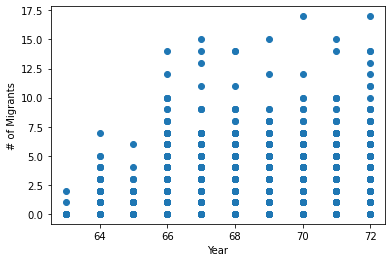

In [393]:
f,ax = plt.subplots()
graph = ax.scatter(Migrants_long['Year'], Migrants_long['MIG'])
#ax.set_ylim([0, 2000])
ax.set_ylabel('# of Migrants')
ax.set_xlabel('Year')
#plt.show()
#plt.savefig('Migrantion_Graph.png')
Migrants_long.loc[Migrants_long['Year'] == 71]['MIG'].mean()

In [116]:
Remitances = pd.DataFrame()
raw_cvfs.replace(' ', 0, inplace = True)
Remitances['HHID'] = raw_cvfs['HHID']
for item in raw_cvfs.columns:
    if 'REM' in item:
        Remitances[item] = raw_cvfs[item].astype(float)
        
   
        
    

print(Remitances.head())
Remitances['REM64'].describe()
Remitances_long = pd.wide_to_long(Remitances, ['REM'], i = 'HHID', j = 'year')
print(Remitances_long)

   HHID  REM63  REM64     REM65     REM66     REM67     REM68     REM69  \
0  2002    0.0    0.0       0.0       0.0       0.0  700000.0  700000.0   
1  2003    0.0    0.0  150000.0  200000.0       0.0       0.0       0.0   
2  2004    0.0    0.0   60000.0   60000.0  170000.0   70000.0   50000.0   
3  2005    0.0    0.0       0.0  380000.0       0.0       0.0  300000.0   
4  2006    0.0    0.0       0.0       0.0       0.0       0.0       0.0   

      REM70     REM71     REM72  
0  750000.0  800000.0  175000.0  
1       0.0       0.0  100000.0  
2   50000.0   25000.0       0.0  
3  100000.0  250000.0       0.0  
4  150000.0       0.0    8000.0  
             REM
HHID   year     
2002   63    0.0
2003   63    0.0
2004   63    0.0
2005   63    0.0
2006   63    0.0
...          ...
170052 72    0.0
170061 72    0.0
171002 72    0.0
171003 72    0.0
171004 72    0.0

[22550 rows x 1 columns]


In [117]:
Remitances_long['Year'] = 0
for index, row in Remitances_long.iterrows():
    Remitances_long['Year'][index] = index[1]

<ipython-input-117-fae0098dcb89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Remitances_long['Year'][index] = index[1]


In [118]:
Remitances_long.head()

,,REM,Year
HHID,year,,
2002,63,0.0,63
2003,63,0.0,63
2004,63,0.0,63
2005,63,0.0,63
2006,63,0.0,63


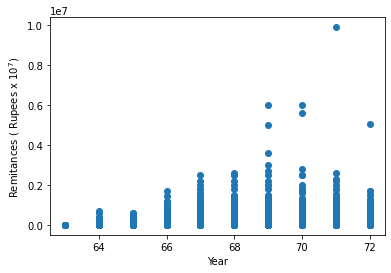

1731.929046563193

In [255]:
f,ax = plt.subplots()
graph = ax.scatter(Remitances_long['Year'], Remitances_long['REM'])
#ax.set_ylim([0, 10000000])
ax.set_ylabel('Remitances ( Rupees x $10^7$)')
ax.set_xlabel('Year')
plt.show()
#plt.savefig(‘Wheat_Graph.eps’) Save all immages using this syntax.


Remitances_long.loc[Remitances_long['Year'] == 64]['REM'].mean()

In [ ]:
#################   FLOOD RATES  #############################################

In [135]:
years = [raw_cvfs.A1_63, raw_cvfs.A1_64, raw_cvfs.A1_65, raw_cvfs.A1_66, raw_cvfs.A1_67, raw_cvfs.A1_68, raw_cvfs.A1_69, raw_cvfs.A1_70, raw_cvfs.A1_71, raw_cvfs.A1_72]
floods = np.zeros(len(years)) 
for index, item in enumerate(years):
    floods[index] = sum(item == 7)
print(floods)   



[0. 9. 1. 1. 2. 1. 1. 8. 3. 8.]


In [ ]:
####################     RICE to REMITTANCE CORRELATIONS  ##################

y = 0.000823x + 714.294156


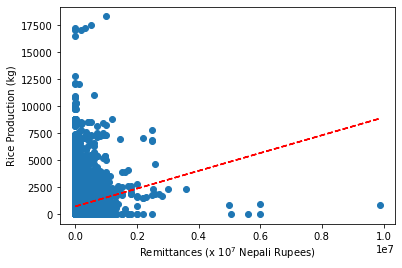

In [210]:
f, ax1 = plt.subplots()

x = Remitances_long['REM']
y = Rice_long['B11B']
ax1.scatter(x, y)

m, b = np.polyfit(x, y, 1)
ax1.plot(x, m*x+b, color='red', ls='--')

print('y = %fx + %f'%(m, b))

ax1.set_xlabel('Remittances (x $10^7$ Nepali Rupees)')
#ax1.set_xlim([0.0, 300000])
ax1.set_ylabel('Rice Production (kg)')

plt.show()

In [ ]:
###########      MAIZE to REMITTANCE CORRELATIONS ###########

y = 0.000247x + 236.253018


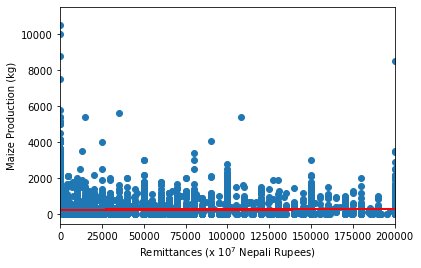

In [149]:
f, ax1 = plt.subplots()

x = Remitances_long['REM']
y = Maize_long['B12B']
ax1.scatter(x, y)

m, b = np.polyfit(x, y, 1)
ax1.plot(x, m*x+b, color='red', ls='--')

print('y = %fx + %f'%(m, b))

ax1.set_xlabel('Remittances (x $10^7$ Nepali Rupees)')
ax1.set_xlim([0.0, 200000])
ax1.set_ylabel('Maize Production (kg)')

plt.show()

y = 0.000022x + 27.317795


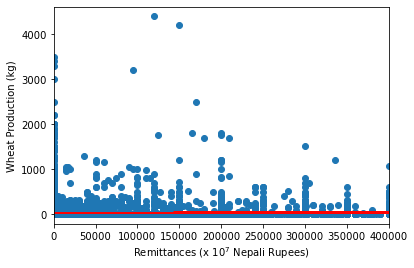

In [148]:
f, ax1 = plt.subplots()

x = Remitances_long['REM']
y = Wheat_long['B13B']
ax1.scatter(x, y)

m, b = np.polyfit(x, y, 1)
ax1.plot(x, m*x+b, color='red', ls='--')

print('y = %fx + %f'%(m, b))

ax1.set_xlabel('Remittances (x $10^7$ Nepali Rupees)')
ax1.set_xlim([0.0, 400000])
ax1.set_ylabel('Wheat Production (kg)')

plt.show()

In [ ]:
###########  Mustard to REMITTANCE CORRELATIONS ###########

y = 0.000023x + 18.179468


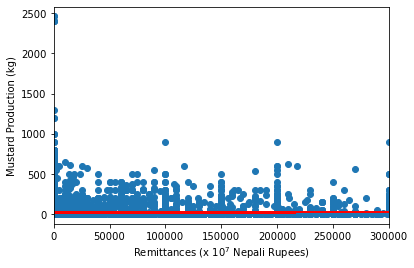

In [151]:
f, ax1 = plt.subplots()

x = Remitances_long['REM']
y = Mustard_long['B14B']
ax1.scatter(x, y)

m, b = np.polyfit(x, y, 1)
ax1.plot(x, m*x+b, color='red', ls='--')

print('y = %fx + %f'%(m, b))

ax1.set_xlabel('Remittances (x $10^7$ Nepali Rupees)')
ax1.set_xlim([0.0, 300000])
ax1.set_ylabel('Mustard Production (kg)')

plt.show()

y = 0.000020x + 12.283861


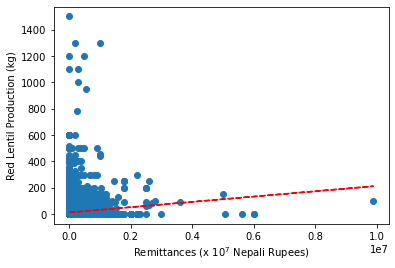

In [155]:
f, ax1 = plt.subplots()

x = Remitances_long['REM']
y = Red_lentil_long['B15B']
ax1.scatter(x, y)

m, b = np.polyfit(x, y, 1)
ax1.plot(x, m*x+b, color='red', ls='--')

print('y = %fx + %f'%(m, b))

ax1.set_xlabel('Remittances (x $10^7$ Nepali Rupees)')
#ax1.set_xlim([0.0, 500000])
ax1.set_ylabel('Red Lentil Production (kg)')

plt.show()